# Editing masks with most anterior / most superior mask coordinates

> Import libraries

In [3]:
import nibabel as nb
import numpy as np

# Ipython notebook settings
import matplotlib.pyplot as plt
%matplotlib inline

> Image location

In [34]:
mni = '/usr/share/fsl/5.0/data/standard/MNI152_T1_1mm_brain.nii.gz'
mask = '/usr/share/fsl/5.0/data/atlases/Thalamus/Thalamus-maxprob-thr0-1mm.nii.gz' # mask input
editedMask = '/home/kangik/mask_edit_out.nii.gz'

> Load mask

In [35]:
mask_f = nb.load(mask)
mask_data = mask_f.get_data()

mni_f = nb.load(mni)
mni_data = mni_f.get_data()

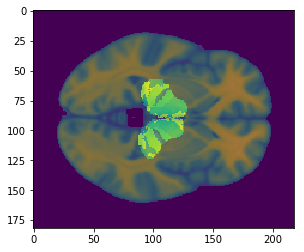

In [41]:
plt.imshow(mni_data[:,:,70])
plt.imshow(mask_data[:,:,70], alpha=0.5)

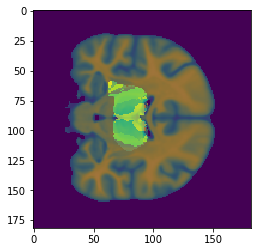

In [44]:
plt.imshow(mni_data[:,110,:])
plt.imshow(mask_data[:,110,:], alpha=0.5)

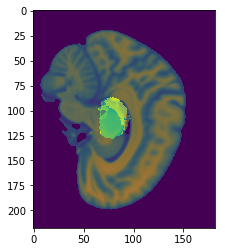

In [45]:
plt.imshow(mni_data[100,:,:])
plt.imshow(mask_data[100,:,:], alpha=0.5)

> Get most rostral coordinates

In [29]:
xcoords, ycoords, zcoords = mask_data.nonzero()

In [30]:
max_xcoord = xcoords.max()
max_ycoord = ycoords.max() 
max_zcoord = zcoords.max()

In [31]:
print max_xcoord, max_ycoord, max_zcoord

123 130 98


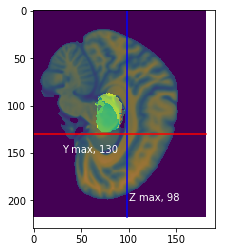

In [89]:
plt.imshow(mni_data[100,:,:])
plt.imshow(mask_data[100,:,:], alpha=0.5)

# z axis
plt.plot(np.repeat(max_zcoord, mask_data.shape[0]), np.linspace(0, mask_data.shape[1], mask_data.shape[0]), 'b-')
plt.text(100, 200, 'Z max, {0}'.format(max_zcoord), color='white')

plt.plot(np.linspace(0, mask_data.shape[2], mask_data.shape[1]), np.repeat(max_ycoord, mask_data.shape[1]), 'r-')
plt.text(30, 150, 'Y max, {0}'.format(max_ycoord), color='white')
# plt.plot(np.repeat(max_zcoord, 300), np.linspace(0, mask_data.shape[1], 300), 'r-')

> Make new mask

In [50]:
new_mask_data = np.zeros_like(mask_data)
new_mask_data[:,:,99:] = 1
new_mask_data[:,131:,:] = 1

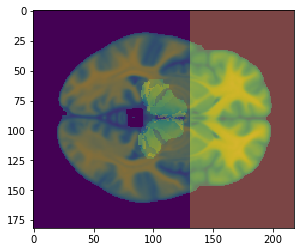

In [53]:
plt.imshow(mni_data[:,:,70])
plt.imshow(mask_data[:,:,70], alpha=0.3)
plt.imshow(new_mask_data[:,:,70], alpha=0.3)

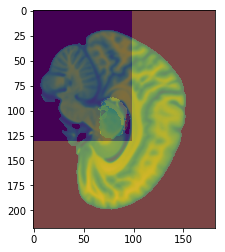

In [54]:
plt.imshow(mni_data[100,:,:])
plt.imshow(mask_data[100,:,:], alpha=0.3)
plt.imshow(new_mask_data[100,:,:], alpha=0.3)

In [57]:
file_to_save = nb.Nifti1Image(new_mask_data, affine=mask_f.affine)
file_to_save.to_filename(editedMask)